#### Short notebook to investigate whether AROME and buoy have same autocorr

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from scipy import stats

In [3]:
# Load data
path_data = "../dataset/"
buoys_df = pd.read_csv(f"{path_data}prepared_buoy_data.csv", index_col=[0, 1])

# Buoy 03
kvs_03 = buoys_df.loc['KVS_SvalMIZ_03'].dropna()    # Drop NaN values from relevant buoy
kvs_03_index, kvs_03_t1m, kvs_03_t2m= kvs_03.index.values, np.array(kvs_03['temp_air'].values), np.array(kvs_03['arome_t2m'].values) # Define variables

#Buoy 07
kvs_07 = buoys_df.loc['KVS_SvalMIZ_07'].dropna()    # Drop NaN values from relevant buoy
kvs_07_index, kvs_07_t1m, kvs_07_t2m = kvs_07.index.values, np.array(kvs_07['temp_air'].values), np.array(kvs_07['arome_t2m'].values) # Define variables

# Buoy 10
kvs_10 = buoys_df.loc['KVS_SvalMIZ_10'].dropna()    # Drop NaN values from relevant buoy  
kvs_10_index, kvs_10_t1m, kvs_10_t2m = kvs_10.index.values, np.array(kvs_10['temp_air'].values), np.array(kvs_10['arome_t2m'].values)# Define variables

In [53]:
# Define autocorrelation function
def autocorr(x):
    n = x.shape[0]  # Sample size
    x_mean = np.mean(x) # Sample mean
    denom = np.sum((x - x_mean)**2) / n # SSD normalized on sample size
    r_L = np.zeros_like(x)
    # Get lag L
    for L in range(1, n):  # COMMENT: n/4 relavant sample size? 
        x_static = x[:x.shape[0]-L]
        x_shifted = x[L:]
        nom = (1. / (n - L)) * np.sum((x_static - x_mean) * (x_shifted - x_mean))
        
        r_L[L] = (nom / denom)
    
    return r_L  # Return AC coefficient for lag L

In [54]:
# Apply autocorrelation function
r_L_kvs_03_t1m = autocorr(kvs_03_t1m)  # Observed 1m air temp buoy 10
r_L_kvs_03_t2m = autocorr(kvs_03_t2m)  # Forecasted 2m air temp AROME

r_L_kvs_07_t1m = autocorr(kvs_07_t1m)  # Observed 1m air temp buoy 10
r_L_kvs_07_t2m = autocorr(kvs_07_t2m)  # Forecasted 2m air temp AROME

r_L_kvs_10_t1m = autocorr(kvs_10_t1m)  # Observed 1m air temp buoy 10
r_L_kvs_10_t2m = autocorr(kvs_10_t2m)  # Forecasted 2m air temp AROME

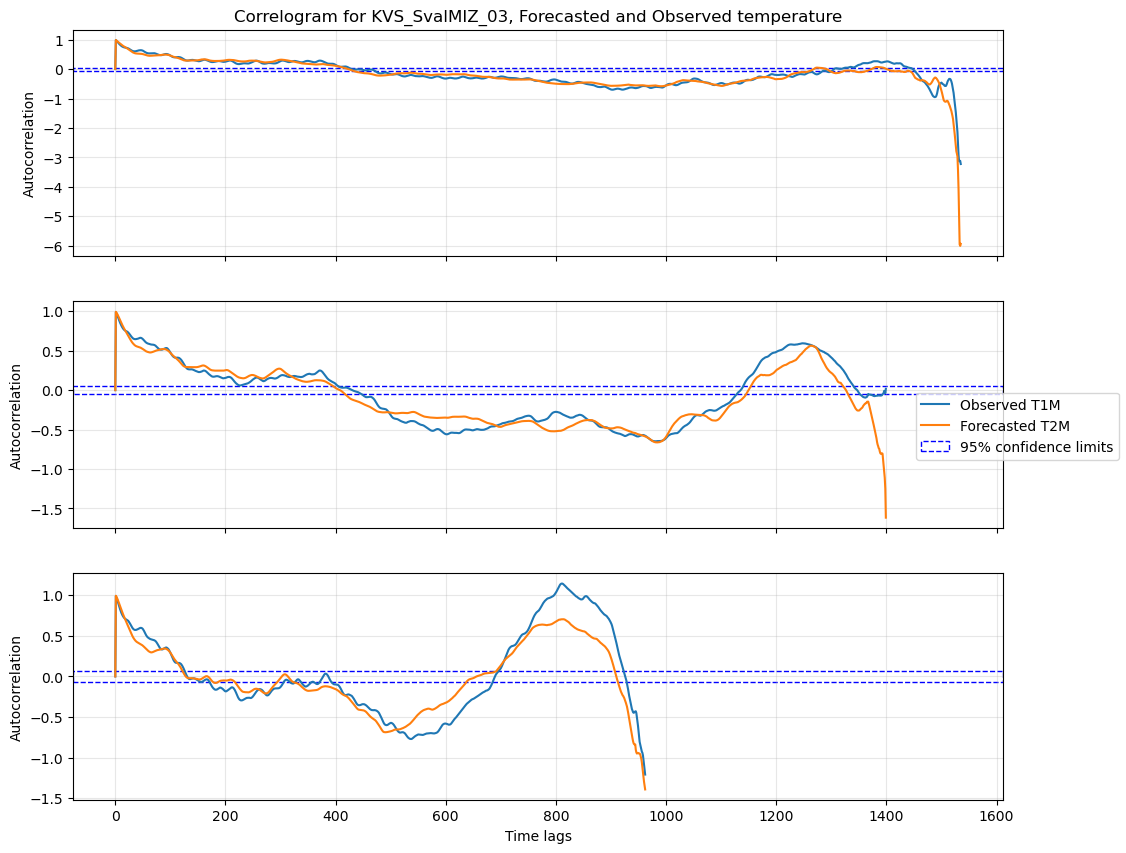

In [55]:
# Plot to compare AC coeff. observed and forecasted
fig, ax = plt.subplots(nrows = 3, figsize=(12, 10), sharex=True)
ax[0].plot(r_L_kvs_03_t1m, label = 'Observed T1M'), ax[0].plot(r_L_kvs_03_t2m, label = 'Forecasted T2M')
ax[0].set_title('Correlogram for KVS_SvalMIZ_03, Forecasted and Observed temperature')

ax[1].plot(r_L_kvs_07_t1m), ax[1].plot(r_L_kvs_07_t2m)

ax[2].plot(r_L_kvs_10_t1m), ax[2].plot(r_L_kvs_10_t2m)
ax[2].set_xlabel('Time lags')

# 95% confidence level
alpha = .05
n_all = [kvs_03.shape[0], kvs_07.shape[0], kvs_10.shape[0]]
l_all=[]
u_all=[]
for n in range(0,len(n_all)):

    l = (-1 - stats.norm.ppf(1 - .5 * alpha) * np.sqrt(n_all[n] - 2)) / (n_all[n] - 1)
    u = (-1 + stats.norm.ppf(1 - .5 * alpha) * np.sqrt(n_all[n] - 2)) / (n_all[n] - 1)
    if n == len(n_all)-1:
        ax[n].axhspan(l, u, ls = '--', ec = 'b', fc = '1', label = r'95% confidence limits')
    else:
        ax[n].axhspan(l, u, ls = '--', ec = 'b', fc = '1')
    ax[n].grid(True, alpha=0.3)
    ax[n].set_ylabel('Autocorrelation')

fig.legend(loc = 'right')

#### The ACC-Lag plot suggests? 

ACC outside CI --> stat. significant 

ACC inside CI --> not stat. significant